## Maxpooling
Here you are going to practice using max-pooling in both OOP and functional way, and see for yourself that the produced results are the same.
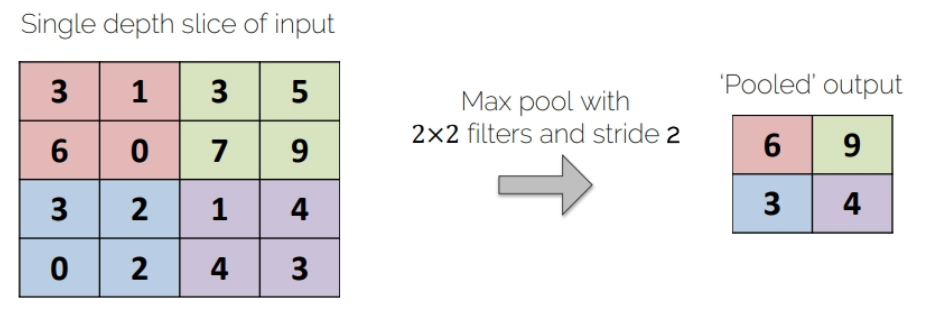

``CLASS torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)``
*  **kernel_size** – the size of the window to take a max over
*  **stride (Union[int, tuple[int, int]])** – the stride of the window. Default value is kernel_size
*  **padding (Union[int, tuple[int, int]])** – Implicit negative infinity padding to be added on both sides

In [ ]:
import torch
import torch.nn as nn

# Example input (1 channel, 4x4 image)
x = torch.tensor([[
    [[1.0, 2.0, 3.0, 4.0],
     [5.0, 6.0, 7.0, 8.0],
     [9.0, 10.0, 11.0, 12.0],
     [13.0, 14.0, 15.0, 16.0]]
]])

print("Input:\n", x)

# MaxPooling with 2x2 window
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
out_max = maxpool(x)
print("\nAfter MaxPool:\n", out_max)



Input:
 tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

After MaxPool:
 tensor([[[[ 6.,  8.],
          [14., 16.]]]])


🌊 **Explanation**: This code demonstrates pooling. Pooling layers reduce the size of feature maps, providing **translation invariance** and lowering computational cost. Common types are Max Pooling and Average Pooling.


## Average-pooling operator
After coding the max-pooling operator, you are now going to code the average-pooling operator. You just need to replace max-pooling with average pooling.

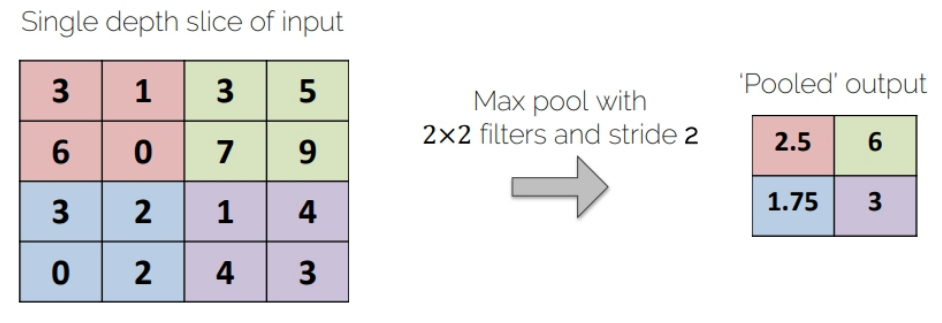

``torch.nn.AvgPool2d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None)``
* **kernel_size** – the size of the window

In [ ]:
import torch
import torch.nn as nn

# Example input (1 channel, 4x4 image)
x = torch.tensor([[
    [[1.0, 2.0, 3.0, 4.0],
     [5.0, 6.0, 7.0, 8.0],
     [9.0, 10.0, 11.0, 12.0],
     [13.0, 14.0, 15.0, 16.0]]
]])

print("Input:\n", x)

# AvgPooling with 2x2 window
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)
out_avg = avgpool(x)
print("\nAfter AvgPool:\n", out_avg)



Input:
 tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

After AvgPool:
 tensor([[[[ 3.5000,  5.5000],
          [11.5000, 13.5000]]]])


🌊 **Explanation**: This code demonstrates pooling. Pooling layers reduce the size of feature maps, providing **translation invariance** and lowering computational cost. Common types are Max Pooling and Average Pooling.


## 🔹What is a Flatten Layer?

In a Convolutional Neural Network (CNN), the convolution and pooling layers produce **multi-dimensional feature maps**.  
For example, the output shape could be:  
\[
(N, C, H, W)
\]  

- **N** = batch size  
- **C** = number of channels (feature maps)  
- **H, W** = spatial dimensions  

However, **fully connected (Linear) layers** only accept **2D inputs**:  
\[
(N, \text{features})
\]  

---

### 🔹Role of Flatten
The **Flatten layer** reshapes the 4D tensor `(N, C, H, W)` into a 2D tensor `(N, C × H × W)`.  
This allows all spatial features to be converted into a single vector per sample, which can then be processed by Linear layers.

---

### 🔹Example
- Before flatten: `(1, 16, 5, 5)`  
- After flatten: `(1, 400)`  

In [ ]:
import torch

x = torch.randn(1, 1, 2, 2)   # example feature map: (batch, channels, height, width)
print("Before flatten:", x.shape)
print(x)

x = torch.flatten(x, 1)        # keep batch dim, flatten the rest
print("After flatten:", x.shape)
print(x)

Before flatten: torch.Size([1, 1, 2, 2])
tensor([[[[ 0.1191, -0.4683],
          [ 0.4895, -0.6730]]]])
After flatten: torch.Size([1, 4])
tensor([[ 0.1191, -0.4683,  0.4895, -0.6730]])


## Ex-1 — Build a simple CNN

### Specification
- Input: `(1, 1, 32, 32)` (grayscale image)
- Layers:
  1. **Conv1:** `in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0`  
     → MaxPool2d(`kernel_size=2, stride=2`)
  2. **Conv2:** `in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0`  
     → MaxPool2d(`kernel_size=2, stride=2`)
  3. **Flatten**
  4. **Linear1:** `in_features=400, out_features=120`
  5. **Linear2:** `120 → 84`
  6. **Linear3:** `84 → 10`

### Tasks
1. Implement this network as a class using `nn.Module`.  
2. Implement the `forward()` method step by step.  
3. Print the output shape after each layer (Conv, Pool, Flatten, Linear).  
4. Verify by hand calculation why `Linear1` has `in_features=400`.  

## Ex-2 — Build a Custom 3-Conv CNN

### Specification
- **Input**: `(1, 3, 64, 64)` (RGB image)
- **Layers**:
  1. **Conv1:** `in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1`  
     → **MaxPool2d**(`kernel_size=2, stride=2`)
  2. **Conv2:** `in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1`  
     → **AvgPool2d**(`kernel_size=2, stride=2`)
  3. **Conv3:** `in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1`  
     → **MaxPool2d**(`kernel_size=2, stride=2`)
  4. **Flatten**
  5. **Linear1:** `in_features=2048, out_features=256`
  6. **Linear2:** `256 → 10`

> Shape hint: After three 2×2 poolings, spatial sizes go **64 → 32 → 16 → 8**.  
> Channels become **32** at the end, so `32 × 8 × 8 = 2048` → this is the `in_features` of Linear1.

### Tasks
1. Implement this network as a class using `nn.Module`.  
2. Print the tensor shape after **Conv1**, **Pool1**, **Conv2**, **Pool2**, **Conv3**, **Pool3**, **Flatten**, **Linear1**, and **Linear2**.  
